# **QUESTION 3 **

---



3. Estimation of Stellar Parameters using Asteroseismology: Stellar properties, in particular, stellar mass and stellar radius are essential for measuring the properties of exoplanets. One of the interesting and transparent ways to obtain the stellar properties for stars exhibiting solar-like oscillation is by a method called asteroseismology, which uses the frequency spectra of the star to estimate its parameters.

Requirement packages:
1.  Lightkurve (for its features to handle Kepler data)
2.  NumPy (to help plot some additional details on figures)
3.  Matplotlib for plotting

In [ ]:
!pip install lightkurve 

In [ ]:
import lightkurve as lk
import numpy as np

In [ ]:
search_result = lk.search_lightcurve("KIC 3632418",
                                     cadence='short',
                                     author='Kepler',
                                     quarter=(2,5,6,7))
lc = search_result.download_all().stitch()

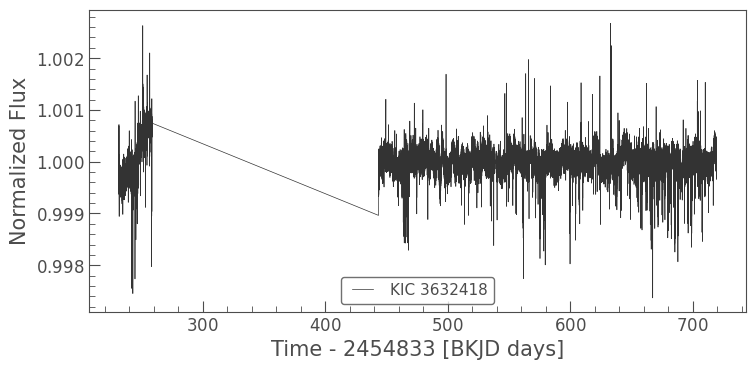

In [ ]:
lc.plot()

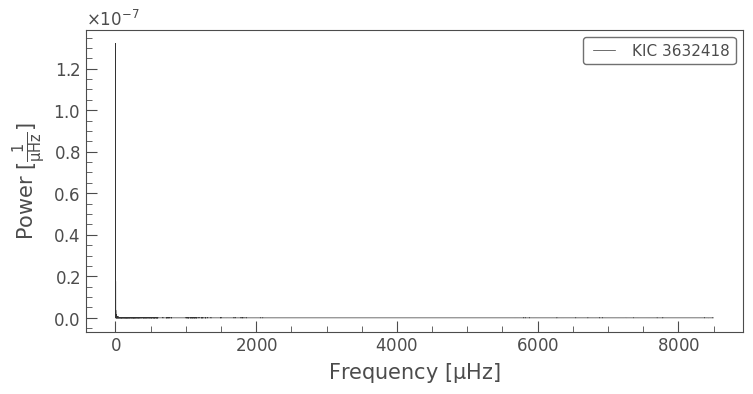

In [ ]:
pg = lc.to_periodogram(normalization='psd')
ax = pg.plot();

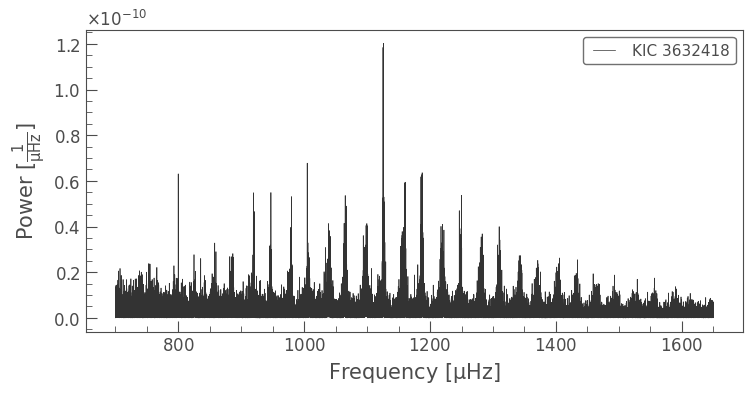

In [ ]:
pg = lc.to_periodogram(normalization='psd',minimum_frequency=700,maximum_frequency=1650)
ax = pg.plot();

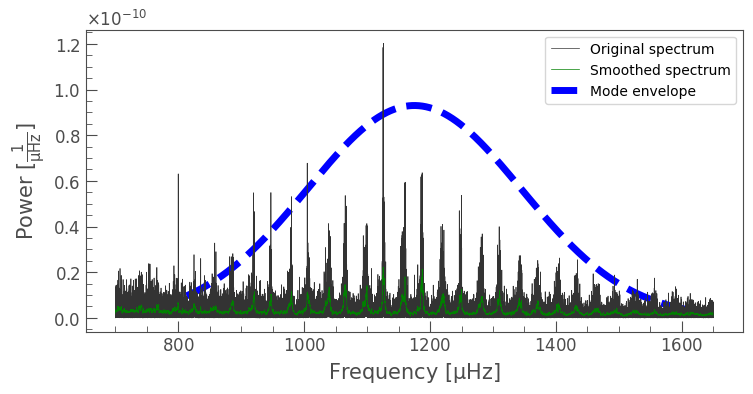

In [ ]:
# Plot a smoothed version of the power spectrum on top in green
ax = pg.plot(label='Original spectrum')
pg.smooth(filter_width=1).plot(ax=ax,
                               color='green',
                               label='Smoothed spectrum')

# Highlight the "mode envelope" using a Gaussian curve
f = pg.frequency.value
ax.plot(f, 9.3e-11*np.exp(-(f-1175)**2/(2*170**2)),
        lw=5, ls='--', zorder=0,
        color='blue', label='Mode envelope');

ax.legend();

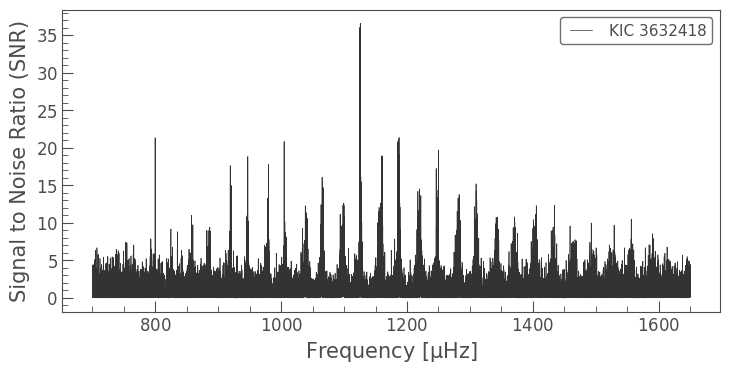

In [ ]:
snr = pg.flatten()
ax = snr.plot();

In [ ]:
seismology = snr.to_seismology()

In [ ]:
seismology.estimate_numax()

numax: 1175.00 uHz (method: ACF2D)

In [ ]:
seismology.numax.value

1175.0

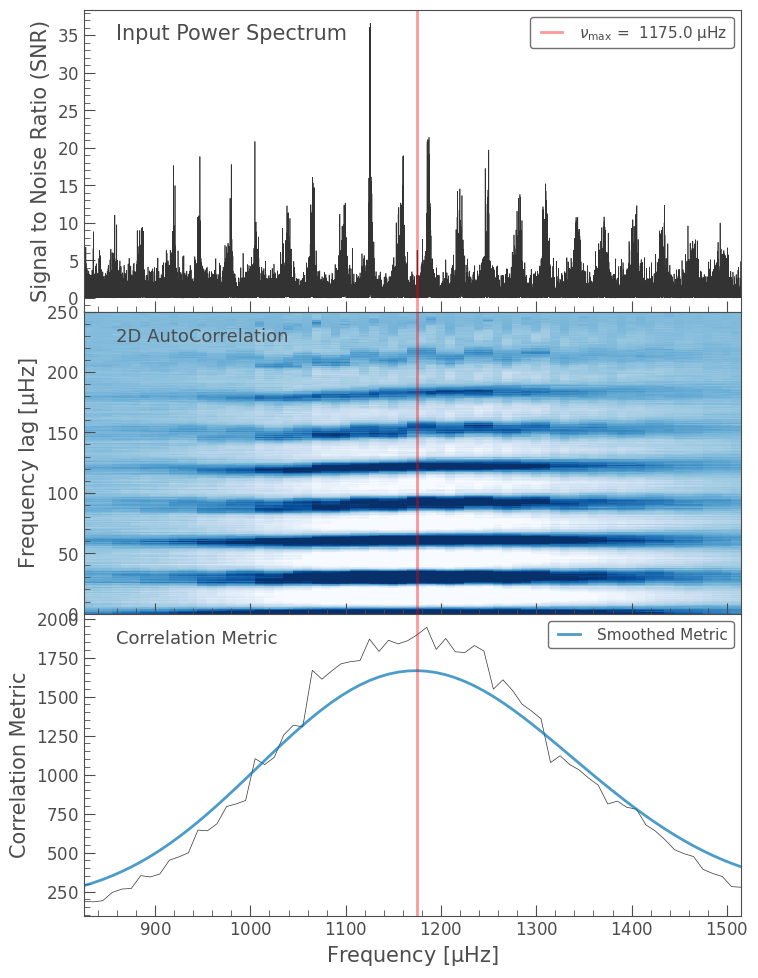

In [ ]:
seismology.diagnose_numax();

In [ ]:
seismology.estimate_deltanu()

deltanu: 60.72 uHz (method: ACF2D)

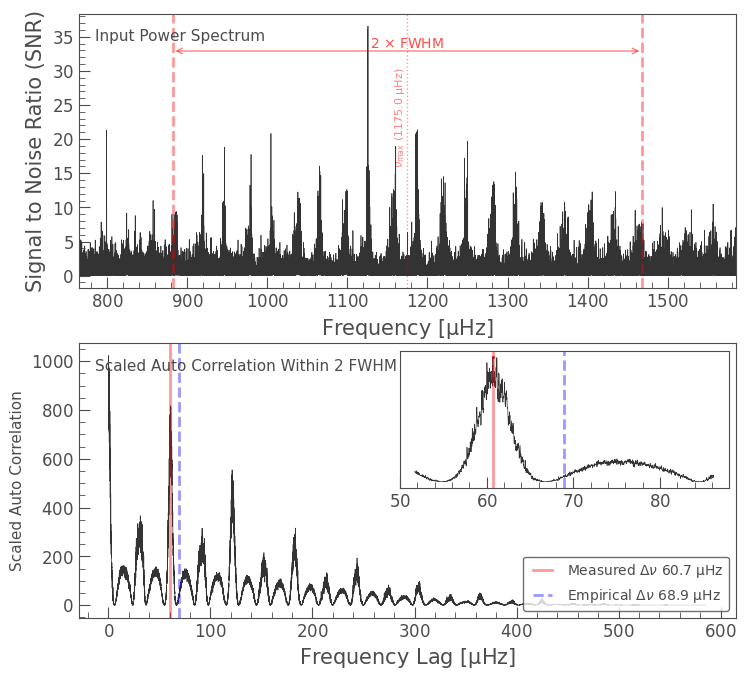

In [ ]:
seismology.diagnose_deltanu();

In [ ]:
seismology.estimate_mass()

mass: 1.50 solMass (method: Uncorrected Scaling Relations)

In [ ]:
seismology.estimate_radius()

radius: 1.95 solRad (method: Uncorrected Scaling Relations)

In [ ]:
seismology.estimate_logg()

logg: 4.03 dex (method: Uncorrected Scaling Relations)

In [ ]:
seismology

Seismology(ID: KIC 3632418) - computed values:
 * numax: 1175.00 uHz (method: ACF2D)
 * deltanu: 60.72 uHz (method: ACF2D)
 * mass: 1.50 solMass (method: Uncorrected Scaling Relations)
 * radius: 1.95 solRad (method: Uncorrected Scaling Relations)
 * logg: 4.03 dex (method: Uncorrected Scaling Relations)